# Machine Learning Aplicado con Python

Este proyecto tiene como objetivo utilizar distintas librerías de Python (Scikit-learn, pandas, numpy, matplotlib, etc...) para entender todo el flujo de trabajo que se realiza cuando se resuelve un problema de Aprendizaje Supervisado de Machine Learning. En este caso, se busca predecir los ingresos que tendrá una película en base a un histórico de datos de películas de la plataforma imdb.

Otras disciplinas:
- Feature engineering
- Selección de modelos

**Conceptos aplicados a este proyecto:**

- Feature Engineering
- Matriz de correlación
- Cross Validation

## Antes de la Práctica:

***Hay que reconocer el tipo de aprendizaje que se necesita***

1. ¿Qué beneficio se piensa generar y para quién?  
2. ¿Cuál de las siguientes funcionalidades sería más útil para lograr ese objetivo?:  
        A. Predecir una métrica  
        B. Predecir una etiqueta  
        C. Agrupar elementos similares  
        D. Optimizar un proceso con prueba y error  
    
Los dos primeros corresponden a **Aprendizaje supervisado**.  

***Hay que aterrizar el problema de aprendizaje supervisado***.  

1. ¿El valor que se quiere predecir es de qué tipo?  
        A. Continuo
        B. Discreto
2. ¿Cuál es la definición de éxito de la predicción?
3. ¿Con qué datos se contará para hacer la predicción?
4. ¿A qué disciplina en particular pertenece la pregunta que se está tratando de resolver?
5. Considerando la intucipon sobre la disciplina, ¿Pueden los datos permitir predecir el objetivo?

### Contexto del Problema

Contexto: Un *ente gubernamental* quiere definir sus políticas de financiamiento de producciones cinematográficas nacionales.

**Sus objetivos son:**  
1. **Ayudar** a la producción de películas de calidad **que no logran ser autosustentables**  
2. Saber qué películas tienen más dificultad de recuperar lo gastado en el presupuesto.  

Por consiguiente, el ente gubernamental quiere **predecir una métrica**: El ingreso mundial generado por una película.  

### Desarrollo del Problema

Estando ubicados en el contexto del problema, se podrían responder las anteriores preguntas de la siguiente manera:

1. Los ingresos de una película corresponden a **valores continuos**
2. El éxito será "**qué tan cerca se está del valor real de ingreso generado por la película**"
3. Los datos se recogerán de **bases de datos públicas de internet**
4. El dominio de trabajo es la **industria del cine**, en particular de la distribución de películas.
5. Los datos podrán permitir predecir el objetivo. De forma general existen características que permiten determinar si una película será exito o no, como: **calidad, actores, presupuesto, etc...**

### Preparación de datos

***NumPy***: librería de matriz n-dimensional base  
***Pandas***: estructura de datos y análisis  
***Matplotlib***: trazado completo 2D  
***Seaborn***: visualización estadística de datos  

In [1]:
import warnings
warnings.simplefilter("ignore")

In [2]:
# Importamos las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**%matplotlib inline** permite que los gráficos estén renderizados directamente en el Notebook.

In [3]:
%matplotlib inline

Se cargan los datos desde un github que contiene un archivo csv.
Dicho archivo se convierte a un DataFrame de pandas.

In [4]:
movies_url = 'https://github.com/JuanPabloMF/datasets-platzi-course/raw/master/datasets/peliculas.csv'
movies_df = pd.read_csv(movies_url, encoding='utf-8')

#### Columnas del DataFrame

Variables predictoras:  
**movie_title**: *Título de la película*  
**title_year**: *Año de estreno de la película*  
**duration**: *Duración de la película en minutos*  
**language**: *Lenguaje original de la película*  
**country**: *País que produció la película*  
**genres**: *Género(s) de la película*  
**content_rating**: *Para qué público va dirigida la película*  
**plot_keywords**: *Palabras clave que definen la película*  
**director_name**: *Nombre del director principal de la película*  
**actor_1_name, actor_2_name, actor_3_name**: *Actores principales que actúan en la película*  
**cast_total_facebook_likes**: *Número total de likes que tiene el casting en Facebook*  
**budget**: *Cuánto presupuesto tiene la película*  
**imdb_score**: *Qué score tiene la película en imdb*  

Variable objetivo:  
**gross**: *Cuánto generó de ingreso la película*  

In [5]:
# se visualizan los primeros registros del DataFrame
movies_df.head()

,movie_title,title_year,color,aspect_ratio,duration,language,country,duration.1,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,2009.0,Color,1.78,178.0,English,USA,178.0,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,4834,237000000.0,7.9,760505847.0
1,Pirates of the Caribbean: At World's End,2007.0,Color,2.35,169.0,English,USA,169.0,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,48350,300000000.0,7.1,309404152.0
2,Spectre,2015.0,Color,2.35,148.0,English,UK,148.0,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,11700,245000000.0,6.8,200074175.0
3,The Dark Knight Rises,2012.0,Color,2.35,164.0,English,USA,164.0,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,106759,250000000.0,8.5,448130642.0
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,143,NaN,7.1,NaN


In [6]:
# visualización de las columnas
movies_df.columns

Index(['movie_title', 'title_year', 'color', 'aspect_ratio', 'duration',
       'language', 'country', 'duration.1', 'genres', 'content_rating',
       'plot_keywords', 'director_name', 'actor_1_name', 'actor_2_name',
       'actor_3_name', 'cast_total_facebook_likes', 'budget', 'imdb_score',
       'gross'],
      dtype='object')

## Entendimiento de los datos

In [7]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   movie_title                5043 non-null   object 
 1   title_year                 4935 non-null   float64
 2   color                      5024 non-null   object 
 3   aspect_ratio               4714 non-null   float64
 4   duration                   5028 non-null   float64
 5   language                   5031 non-null   object 
 6   country                    5038 non-null   object 
 7   duration.1                 5028 non-null   float64
 8   genres                     5043 non-null   object 
 9   content_rating             4740 non-null   object 
 10  plot_keywords              4890 non-null   object 
 11  director_name              4939 non-null   object 
 12  actor_1_name               5036 non-null   object 
 13  actor_2_name               5030 non-null   objec

In [8]:
movies_df.dtypes

movie_title                   object
title_year                   float64
color                         object
aspect_ratio                 float64
duration                     float64
language                      object
country                       object
duration.1                   float64
genres                        object
content_rating                object
plot_keywords                 object
director_name                 object
actor_1_name                  object
actor_2_name                  object
actor_3_name                  object
cast_total_facebook_likes      int64
budget                       float64
imdb_score                   float64
gross                        float64
dtype: object

#### Separación de datos

In [9]:
# Obtención de columnas numéricas
movies_num_df = movies_df.select_dtypes(exclude=['object'])
movies_num_df.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


In [10]:
# Obtención de columnas de texto (object)
movies_obj_df = movies_df.select_dtypes(include=['object'])
movies_obj_df.head()

,movie_title,color,language,country,genres,content_rating,plot_keywords,director_name,actor_1_name,actor_2_name,actor_3_name
0,Avatar,Color,English,USA,Action|Adventure|Fantasy|Sci-Fi,PG-13,avatar|future|marine|native|paraplegic,James Cameron,CCH Pounder,Joel David Moore,Wes Studi
1,Pirates of the Caribbean: At World's End,Color,English,USA,Action|Adventure|Fantasy,PG-13,goddess|marriage ceremony|marriage proposal|pi...,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport
2,Spectre,Color,English,UK,Action|Adventure|Thriller,PG-13,bomb|espionage|sequel|spy|terrorist,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman
3,The Dark Knight Rises,Color,English,USA,Action|Thriller,PG-13,deception|imprisonment|lawlessness|police offi...,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt
4,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,NaN,Documentary,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN


#### Estadísticas

Algunas estadísticas numéricas:  

- El promedio de likes del casting de las películas es de **9700 likes**
- Una película dura en promedio **107 minutos**
- La película con más duración es de **511 minutos**
- La película con menos duración es de **7 minutos**

In [11]:
# Estadísticas de las columnas numéricas
movies_num_df.describe()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
count,4935.000000,4714.000000,5028.000000,5028.000000,5043.000000,4.551000e+03,5043.000000,4.159000e+03
mean,2002.470517,2.220403,107.201074,107.201074,9699.063851,3.975262e+07,6.442138,4.846841e+07
std,12.474599,1.385113,25.197441,25.197441,18163.799124,2.061149e+08,1.125116,6.845299e+07
min,1916.000000,1.180000,7.000000,7.000000,0.000000,2.180000e+02,1.600000,1.620000e+02
25%,1999.000000,1.850000,93.000000,93.000000,1411.000000,6.000000e+06,5.800000,5.340988e+06
50%,2005.000000,2.350000,103.000000,103.000000,3090.000000,2.000000e+07,6.600000,2.551750e+07
75%,2011.000000,2.350000,118.000000,118.000000,13756.500000,4.500000e+07,7.200000,6.230944e+07
max,2016.000000,16.000000,511.000000,511.000000,656730.000000,1.221550e+10,9.500000,7.605058e+08


<AxesSubplot:>

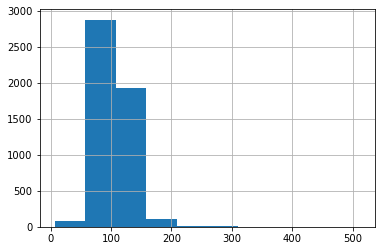

In [12]:
movies_num_df['duration'].hist()

<AxesSubplot:>

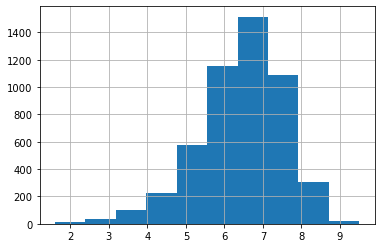

In [13]:
movies_num_df['imdb_score'].hist()

<AxesSubplot:>

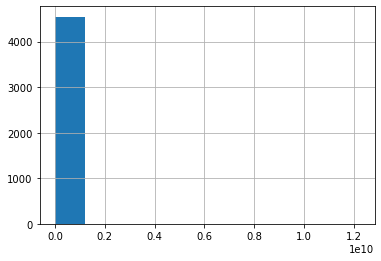

In [14]:
movies_num_df['budget'].hist()

Se alcanzan a ver problemas de limpieza de los datos. La BDD fue creada sin diferenciar:

- La moneda en la que se ingresaba el presupuesto y el ingreso.
- La zona(país/mundial) en la que se registró el ingreso.

Se arreglará haciendo un merge con otro dataset.

### Haciendo un Join entre dos datasets

In [15]:
thenumbers_url = 'https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/datasets/thenumbers.csv'
financials_df = pd.read_csv(thenumbers_url, encoding='utf-8')

In [16]:
financials_df = financials_df[['movie_title', 'production_budget', 'worldwide_gross']]

In [17]:
financials_df

,movie_title,production_budget,worldwide_gross
0,Avatar,425000000,2783918982
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225
2,Pirates of the Caribbean: At World's End,300000000,963420425
3,Spectre,300000000,879620923
4,The Dark Knight Rises,275000000,1084439099
...,...,...,...
4336,The Mongol King,7000,900
4337,Signed Sealed Delivered,5000,0
4338,Shanghai Calling,3967,10443
4339,A Plague So Pleasant,1400,0


In [18]:
print(financials_df.shape)
print(movies_df.shape)

(4341, 3)
(5043, 19)


En este caso se priorizará la calidad de los datos sobre la cantidad.
Tendremos que trabajar con los 4341 datos que tiene el dataframe financials.

Antes de poder aplicar la función merge de pandas, se necesita agregar la misma llave con la que se podrá hacer el join al dataframe numérico de películas (porque no tiene la columna movie_titles).

Hay que **concatenar** la columna

In [19]:
movies_df['movie_title'].head()

0                                              Avatar 
1            Pirates of the Caribbean: At World's End 
2                                             Spectre 
3                               The Dark Knight Rises 
4    Star Wars: Episode VII - The Force Awakens    ...
Name: movie_title, dtype: object

con...

In [20]:
movies_num_df.head()

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN


In [21]:
# Al dataframe movies_num_df se le concatena la columa movie_title. axis=1 -> concatenación de columna.
movies_num_df = pd.concat([movies_num_df, movies_df['movie_title']], axis=1)
movies_num_df

,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross,movie_title
0,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0,Avatar
1,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0,Pirates of the Caribbean: At World's End
2,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0,Spectre
3,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0,The Dark Knight Rises
4,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN,Star Wars: Episode VII - The Force Awakens ...
...,...,...,...,...,...,...,...,...,...
5038,2013.0,NaN,87.0,87.0,2283,NaN,7.7,NaN,Signed Sealed Delivered
5039,NaN,16.00,43.0,43.0,1753,NaN,7.5,NaN,The Following
5040,2013.0,NaN,76.0,76.0,0,1400.0,6.3,NaN,A Plague So Pleasant
5041,2012.0,2.35,100.0,100.0,2386,NaN,6.3,10443.0,Shanghai Calling


Se hace el merge, uniendo el DataFrame financials con el de movies_num_df.  
La llave para hacer el join será 'movie_title'.  
El Join será de tipo Left. Guardará las llaves que estén presentes siempre en financials y no solamente en movies_num_df.

In [22]:
movies_df_v2 = pd.merge(financials_df, movies_num_df, on='movie_title', how='left')

In [23]:
movies_df_v2.head()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,Avatar,425000000,2783918982,2009.0,1.78,178.0,178.0,4834,237000000.0,7.9,760505847.0
1,Star Wars: Episode VII - The Force Awakens ...,306000000,2058662225,NaN,NaN,NaN,NaN,143,NaN,7.1,NaN
2,Pirates of the Caribbean: At World's End,300000000,963420425,2007.0,2.35,169.0,169.0,48350,300000000.0,7.1,309404152.0
3,Spectre,300000000,879620923,2015.0,2.35,148.0,148.0,11700,245000000.0,6.8,200074175.0
4,The Dark Knight Rises,275000000,1084439099,2012.0,2.35,164.0,164.0,106759,250000000.0,8.5,448130642.0


In [24]:
movies_df_v2.shape

(4385, 11)

### Limpieza de Datos Nulos

In [25]:
# notnull muestra si un dato no es nulo
movies_df_v2.notnull()

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,True,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,True,True,False,True,True,True,True,True,False


In [26]:
# Definición: The apply() function is used to apply a function along an axis of the DataFrame
# value_counts cuenta el número de valores en una columna.
movies_df_v2.notnull().apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,NaN,27,274,13,13,NaN,335,NaN,671
True,4385.0,4385.0,4385.0,4358,4111,4372,4372,4385.0,4050,4385.0,3714


Ahora se buscaran valores que relacionados con el cero, en vez de nulo.

In [27]:
(movies_df_v2 != 0).apply(pd.Series.value_counts)

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
False,NaN,NaN,281,NaN,NaN,NaN,NaN,27,NaN,NaN,NaN
True,4385.0,4385.0,4104,4385.0,4385.0,4385.0,4385.0,4358,4385.0,4385.0,4385.0


No se puede entrenar un algoritmo con datos cuya variable objetivo (worldwide_gross) no está definida o es nula (valor False). Hay que eliminar esas líneas.

In [28]:
# Se crea un nuevo dataframe. Si en movies_df_v2 un valor es cero o es nulo, el valor en el nuevo dataframe será False.
notzero_notnull_df = ((movies_df_v2 != 0) & (movies_df_v2.notnull()))

In [29]:
notzero_notnull_df

,movie_title,production_budget,worldwide_gross,title_year,aspect_ratio,duration,duration.1,cast_total_facebook_likes,budget,imdb_score,gross
0,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,False,False,False,False,True,False,True,False
2,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...
4380,True,True,True,True,False,True,True,True,True,True,False
4381,True,True,False,True,False,True,True,True,False,True,False
4382,True,True,True,True,True,True,True,True,False,True,True
4383,True,True,False,True,False,True,True,False,True,True,False


In [30]:
# Al revisar una linea, si toda la línea tiene valores True, el valor que lanzará será True. De lo contrario será False.
notzero_notnull_df.all(axis=1)

0        True
1       False
2        True
3        True
4        True
        ...  
4380    False
4381    False
4382    False
4383    False
4384     True
Length: 4385, dtype: bool

In [31]:
notzero_notnull_df.all(axis=1).value_counts()

True     3408
False     977
dtype: int64

Son muchos los datos que se perderían si se tomara la decisión de borrar todas las filas que contengan nulos o que contengan un valor de cero. Se toma la decisión de eliminar solo las filas cuya variable objetiva sea nulo o sea cero.

In [32]:
notzero_notnull_wwgross = notzero_notnull_df['worldwide_gross']
movies_df_v2 = movies_df_v2[notzero_notnull_wwgross]

In [33]:
((movies_df_v2 != 0) & (movies_df_v2.notnull())).worldwide_gross.value_counts()

True    4104
Name: worldwide_gross, dtype: int64

### Retirando columna de tipo objeto

In [34]:
movies_df_v2 = movies_df_v2.drop('movie_title', axis=1)

Retirando columna duplicada

In [35]:
movies_df_v2 = movies_df_v2.drop('duration.1', axis=1)

### Moviendo la variable objetivo a la última columna del DataFrame

In [36]:
new_cols = [col for col in movies_df_v2.columns if (col != 'worldwide_gross' and col != 'gross')] + ['worldwide_gross']
new_cols

['production_budget',
 'title_year',
 'aspect_ratio',
 'duration',
 'cast_total_facebook_likes',
 'budget',
 'imdb_score',
 'worldwide_gross']

In [37]:
movies_df_v2 = movies_df_v2[new_cols]
movies_df_v2.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,worldwide_gross
0,425000000,2009.0,1.78,178.0,4834,237000000.0,7.9,2783918982
1,306000000,NaN,NaN,NaN,143,NaN,7.1,2058662225
2,300000000,2007.0,2.35,169.0,48350,300000000.0,7.1,963420425
3,300000000,2015.0,2.35,148.0,11700,245000000.0,6.8,879620923
4,275000000,2012.0,2.35,164.0,106759,250000000.0,8.5,1084439099


Luego de eliminar datos de la variable objetivo y hacer correciones, se considera terminada la parte de limpieza de datos. Utilizaremos scikit-learn para tratar con los datos faltantes de las variables predictoras.

### Imputación de datos faltantes con *scikit-learn*

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [39]:
values = imputer.fit_transform(movies_df_v2)

In [40]:
values

array([[4.25000000e+08, 2.00900000e+03, 1.78000000e+00, ...,
        2.37000000e+08, 7.90000000e+00, 2.78391898e+09],
       [3.06000000e+08, 2.00213073e+03, 2.12697615e+00, ...,
        4.04553863e+07, 7.10000000e+00, 2.05866222e+09],
       [3.00000000e+08, 2.00700000e+03, 2.35000000e+00, ...,
        3.00000000e+08, 7.10000000e+00, 9.63420425e+08],
       ...,
       [7.00000000e+03, 2.00500000e+03, 2.12697615e+00, ...,
        3.25000000e+03, 7.80000000e+00, 9.00000000e+02],
       [3.96700000e+03, 2.01200000e+03, 2.35000000e+00, ...,
        4.04553863e+07, 6.30000000e+00, 1.04430000e+04],
       [1.10000000e+03, 2.00400000e+03, 1.85000000e+00, ...,
        1.10000000e+03, 6.60000000e+00, 1.81041000e+05]])

In [41]:
X = pd.DataFrame(values)
X.columns = movies_df_v2.columns
X.index = movies_df_v2.index
X.head()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,worldwide_gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,2.783919e+09
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,2.058662e+09
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,9.634204e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,8.796209e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,1.084439e+09


In [42]:
X.to_csv('data/X.csv', index=False)

## Scikit-learn

Existe una API fácil de ocupar y unificada. Esta unificación se da por un objeto llamado **Estimator**, que tiene para cada algoritmo de Machine Learning una API que es común y tres métodos clave.

Scikit-learn es la librería más usada de Machine Learning tradicional. La librería incluye funcionalidades de:

- Preprocesamiento de datos en *sklearn.preprocessing*
- Algoritmos de Machine Learning en *sklearn.linear_model, sklearn.svm, sklearn.ensemble, etc...*
- Evaluación de modelos en *sklearn.model_selection* y *sklearn.metrics*

#### Estimator

Los 3 métodos mas importantes del Estimador son:

- **Fit**: Entrena el modelo.
- **Predict**: Predice valores, con datos nuevos.
- **Score**: Mide el performace del algoritmo y nos indica una probabilidad.

![Image](img/scikit-learn_cheatsheet.png)

## Regresión Simple en Python

In [43]:
# Se importan los datos
X = pd.read_csv('data/X.csv')

In [44]:
X

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,worldwide_gross
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,2.783919e+09
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,2.058662e+09
2,300000000.0,2007.000000,2.350000,169.000000,48350.0,3.000000e+08,7.1,9.634204e+08
3,300000000.0,2015.000000,2.350000,148.000000,11700.0,2.450000e+08,6.8,8.796209e+08
4,275000000.0,2012.000000,2.350000,164.000000,106759.0,2.500000e+08,8.5,1.084439e+09
...,...,...,...,...,...,...,...,...
4099,7000.0,2004.000000,1.850000,77.000000,368.0,7.000000e+03,7.0,8.419260e+05
4100,7000.0,2005.000000,2.126976,80.000000,0.0,7.000000e+03,6.3,7.164400e+04
4101,7000.0,2005.000000,2.126976,84.000000,93.0,3.250000e+03,7.8,9.000000e+02
4102,3967.0,2012.000000,2.350000,100.000000,2386.0,4.045539e+07,6.3,1.044300e+04


Hay que separar las variables predictoras de la variable objetivo, para poderlas usarlas bien como argumentos en cada uno de los métodos de scikit-learn. 

La variable objetivo se lleva a un vector y.

In [45]:
y = X['worldwide_gross']
y

0       2.783919e+09
1       2.058662e+09
2       9.634204e+08
3       8.796209e+08
4       1.084439e+09
            ...     
4099    8.419260e+05
4100    7.164400e+04
4101    9.000000e+02
4102    1.044300e+04
4103    1.810410e+05
Name: worldwide_gross, Length: 4104, dtype: float64

In [46]:
X = X.drop(['worldwide_gross'], axis=1)
X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [48]:
print(len(X))
print(len(X_train))
print(len(X_test))

4104
2462
1642


In [49]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [50]:
from sklearn.linear_model import Lasso

model = Lasso()

In [51]:
# Se entrena el modelo
model.fit(X_train, y_train)

Lasso()

In [52]:
predicted = model.predict(X_test)

In [53]:
# Se miran las predicciones del test set
predicted

array([1.79220454e+08, 2.35796300e+07, 2.18924480e+08, ...,
       5.43155825e+07, 8.01845659e+07, 7.59655420e+07])

In [54]:
predicted.shape

(1642,)

#### Comparación entre datos predichos y datos reales

Text(0.5, 1.0, 'predicted y vs y test')

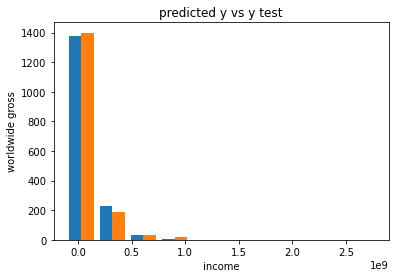

In [55]:
plt.hist([predicted, y_test]);
plt.xlabel('income')
plt.ylabel('worldwide gross')
plt.title('predicted y vs y test')

**Antes de avanzar en el proyecto es importante recordar estos conceptos:**

- **Underfitting**: Se presenta cuando un modelo no puede capturar la tendencia de los datos. Es generalmente el resultado de un modelo extremadamente simple.
- **Overfitting**: Se presenta cuando un algoritmo está perfectamente adaptado a los datos con los que lo entrenamos, pero si trataran de predecir nuevos datos, lo más probable es que nos de error.

## Evaluando el Modelo de Regresión con la métrica de Scikit-learn r2 score

Para evaluar el performance del modelo scikit-learn ofrece diferentes métricas que vienen en el módulo ***sklearn.metrics***.

Y por otro lado, ***sklearn.model_selection*** ofrece funciones para poder sacar scores. Estas funciones en general ocupan internamente las métricas delo módulo ***sklearn.metrics***.

En el caso de las **regresiones**, se suele ocupar mucho la métrica **sklearn.metric.r2_score**

### sklearn.metric.r2_score

El **score R2** de una regresión es una de las formas más comunes de entender su poder predictivo.  
**mientras más cerca de 1, mejor**.

**Rango**: Desde -infinito hasta 1.

**score R2 negativo** -> Muy malo.

In [56]:
model.score(X_test, y_test)

0.587749500219344

Se recibió un score de 0.56. Se puede mejorar.

### Visualización de los resultados

In [57]:
residuals = y_test - predicted

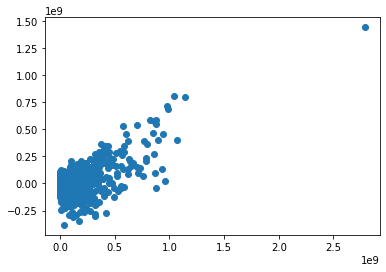

In [58]:
# En la gráfica de residuos tratamos de buscar que no se vean patrones aparentes.
plt.scatter(y_test, residuals)

In [59]:
# Se visualizarán los mismos errores pero en porcentaje.
ap_residuals = np.abs(residuals)/y_test

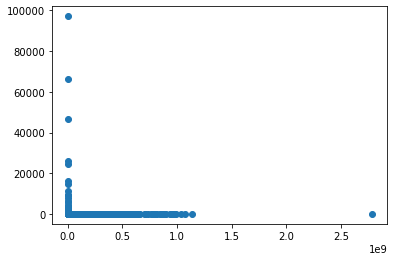

In [60]:
plt.scatter(y_test, ap_residuals)

Se puede notar que casi todo está en cero. Pero la visualización en esa escala no se ve muy buena.  
Se aplica una escala logarítmica.  

In [61]:
lap_residuals = np.log10(ap_residuals)

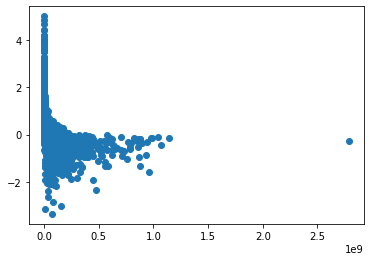

In [62]:
plt.scatter(y_test, lap_residuals)

En base al gráfico, se puede concluir que se cuenta con una primera buena aproximación.  
Ahora se realizará una evaluación numérica de los errores.  

(array([6.09013398e-04, 6.09013398e-04, 1.21802680e-03, 1.21802680e-03,
        1.82704019e-03, 1.82704019e-03, 2.43605359e-03, 2.43605359e-03,
        3.04506699e-03, 3.04506699e-03, 3.04506699e-03, 3.65408039e-03,
        4.26309379e-03, 4.26309379e-03, 5.48112058e-03, 7.30816078e-03,
        9.13520097e-03, 1.03532278e-02, 1.33982948e-02, 1.46163216e-02,
        1.88794153e-02, 2.13154689e-02, 2.74056029e-02, 3.65408039e-02,
        4.38489647e-02, 4.87210719e-02, 5.60292326e-02, 6.27283800e-02,
        7.30816078e-02, 9.50060901e-02, 1.12058465e-01, 1.35200974e-01,
        1.65651644e-01, 2.02801462e-01, 2.39951279e-01, 2.88063337e-01,
        3.37393423e-01, 3.92813642e-01, 4.45188794e-01, 4.90864799e-01,
        5.28623630e-01, 5.71254568e-01, 6.06577345e-01, 6.33982948e-01,
        6.63824604e-01, 6.91839220e-01, 7.18026797e-01, 7.42387333e-01,
        7.66138855e-01, 7.89890378e-01, 8.10596833e-01, 8.27040195e-01,
        8.41656516e-01, 8.57490865e-01, 8.70280146e-01, 8.806333

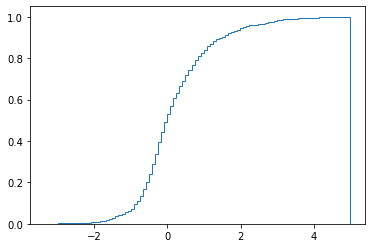

In [63]:
plt.hist(lap_residuals, bins=100, density=1, histtype='step', cumulative=True)

La lectura del gráfico anterior es que un error menor al 100% en el valor del ingreso, por lo menos lo tengo para el 70% de los datos.
Hacemos feature engineering.

## Feature Engineering

Diseñar features: poder transformar y definir nuevas columnas en un DataFrame.

Al encodear de buena forma las features, se puede lograr un excelente rendimiento.

#### Principios de diseño de Features

Diseñar features es un arte más que una ciencia. Se gana más experiencia leyendo artículos científicos y viendo soluciones.
1. **Features informativas**: Las features son más útiles mientras más correlación tengan con la variable objetivo.
2. **Features independientes**: Para no tener redundancias las features deben ser lo más independientes posibles entre ellas.
3. **Cantidad de Features controlada**: La intuición falla cuando las dimensiones son superiores a 3. En la mayoría de los casos aumentar la cantidad de features afecta negativamente la performance si no se cuenta con una gran cantidad de datos. Por último pocas features aseguran una mejor interpretabilidad de los modelos.

#### SVM

Las máquinas de soporte vectorial, máquinas de vectores de soporte o máquinas de
vector soporte (Support Vector Machines, SVMs) son un conjunto de algoritmos de
aprendizaje supervisado
Idea Simple:
Dado un conjunto de puntos, subconjunto de un conjunto mayor (espacio), en el que cada
uno de ellos pertenece a una de dos posibles categorías, un algoritmo basado en SVM
construye un modelo capaz de predecir si un punto nuevo (cuya categoría desconocemos)
pertenece a una categoría o a la otra.
    

![Image](img/svm_dimensionalidad.png)

In [64]:
# Se importan los datos
X = pd.read_csv('data/X.csv')

In [65]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,worldwide_gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,2.783919e+09


### Matriz de correlaciones

In [66]:
# Matriz de correlación
X.corr()

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,worldwide_gross
production_budget,1.000000,0.207884,0.077459,0.276407,0.236820,0.185357,0.033154,0.735318
title_year,0.207884,1.000000,0.130532,-0.137662,0.124693,0.048664,-0.178685,0.111144
aspect_ratio,0.077459,0.130532,1.000000,-0.012645,0.020656,0.011340,0.037765,0.033700
duration,0.276407,-0.137662,-0.012645,1.000000,0.121918,0.064252,0.315642,0.253027
cast_total_facebook_likes,0.236820,0.124693,0.020656,0.121918,1.000000,0.032591,0.096663,0.205110
budget,0.185357,0.048664,0.011340,0.064252,0.032591,1.000000,0.019417,0.125527
imdb_score,0.033154,-0.178685,0.037765,0.315642,0.096663,0.019417,1.000000,0.193667
worldwide_gross,0.735318,0.111144,0.033700,0.253027,0.205110,0.125527,0.193667,1.000000


<AxesSubplot:>

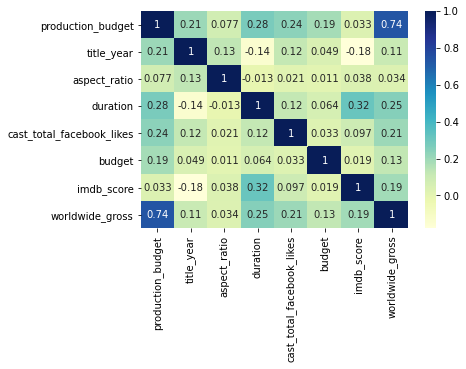

In [67]:
# Matriz de correlación con Seaborn. Mapa de calor.
# Retirar cmap si se quiere la matriz de otro color.
sns.heatmap(X.corr(), annot=True, cmap="YlGnBu")

## Feedback de los modelos

Ciertos modelos como la regresión o los árboles se dicen "**interpretables**". Esto quiere decir que de los resultados de los modelos se pueden sacar conclusiones o "**insights**".

En particular, la regresión Lasso es interpretable:

- Mientras más grande es el coeficiente para una feature, más relevante es esta para la regresión.
- La regresión Lasso trata de seleccionar un pequeño número de features relevantes.

In [68]:
X = pd.read_csv('data/X.csv')

X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,worldwide_gross
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9,2.783919e+09


In [69]:
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [70]:
y.head(1)

0    2.783919e+09
Name: worldwide_gross, dtype: float64

In [71]:
X.head(1)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
0,425000000.0,2009.0,1.78,178.0,4834.0,237000000.0,7.9


In [72]:
from sklearn.linear_model import Lasso

model = Lasso()

In [73]:
# Separación de los datos de entrenamiento
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y)

In [74]:
X_train

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score
3980,350000.0,2005.0,1.85,88.0,15.0,1750211.0,7.8
1810,24000000.0,2003.0,2.35,88.0,10325.0,24000000.0,7.2
2783,10000000.0,1998.0,1.85,100.0,6046.0,10000000.0,6.3
1130,40000000.0,2011.0,2.35,112.0,3432.0,40000000.0,6.4
152,139000000.0,2002.0,1.85,121.0,40484.0,139000000.0,7.3
...,...,...,...,...,...,...,...
3536,2900000.0,1998.0,2.35,113.0,167.0,2900000.0,8.0
3899,750000.0,2006.0,2.35,90.0,2170.0,750000.0,5.6
961,45000000.0,2003.0,1.85,84.0,3629.0,48000000.0,5.5
2555,12500000.0,2002.0,1.85,109.0,14347.0,12500000.0,6.9


In [75]:
len(X_train)/len(X)

0.75

In [76]:
model.fit(X_train, y_train)

Lasso()

In [77]:
model.score(X_test, y_test)

0.5467415658536681

In [78]:
# Parámetros de la regresión lineal
model.coef_

array([ 3.20518504e+00, -1.65772421e+05, -6.77628948e+06, -6.86955547e+04,
        1.41180590e+02, -5.05832345e-02,  2.89128458e+07])

In [79]:
# Ordenes de magnitud de los parámetros
var = np.floor(np.log10(np.abs(model.coef_)))
var

array([ 0.,  5.,  6.,  4.,  2., -2.,  7.])

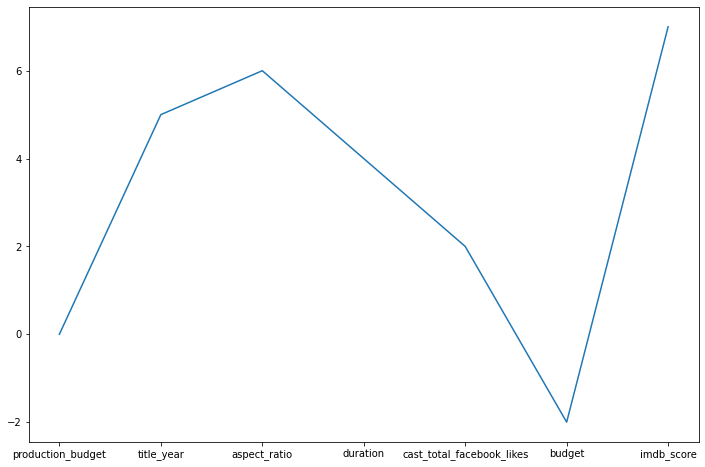

In [80]:
plt.rcParams["figure.figsize"] = [12,8]
plt.plot(var)
plt.xticks(np.arange(7), list(X.columns));

El gráfico nos guía a guardar únicamente las siguientes variables:

- title_year
- aspect_ratio
- duration
- cast_total_facebook_likes
- imdb_score

### Correlación entre variables

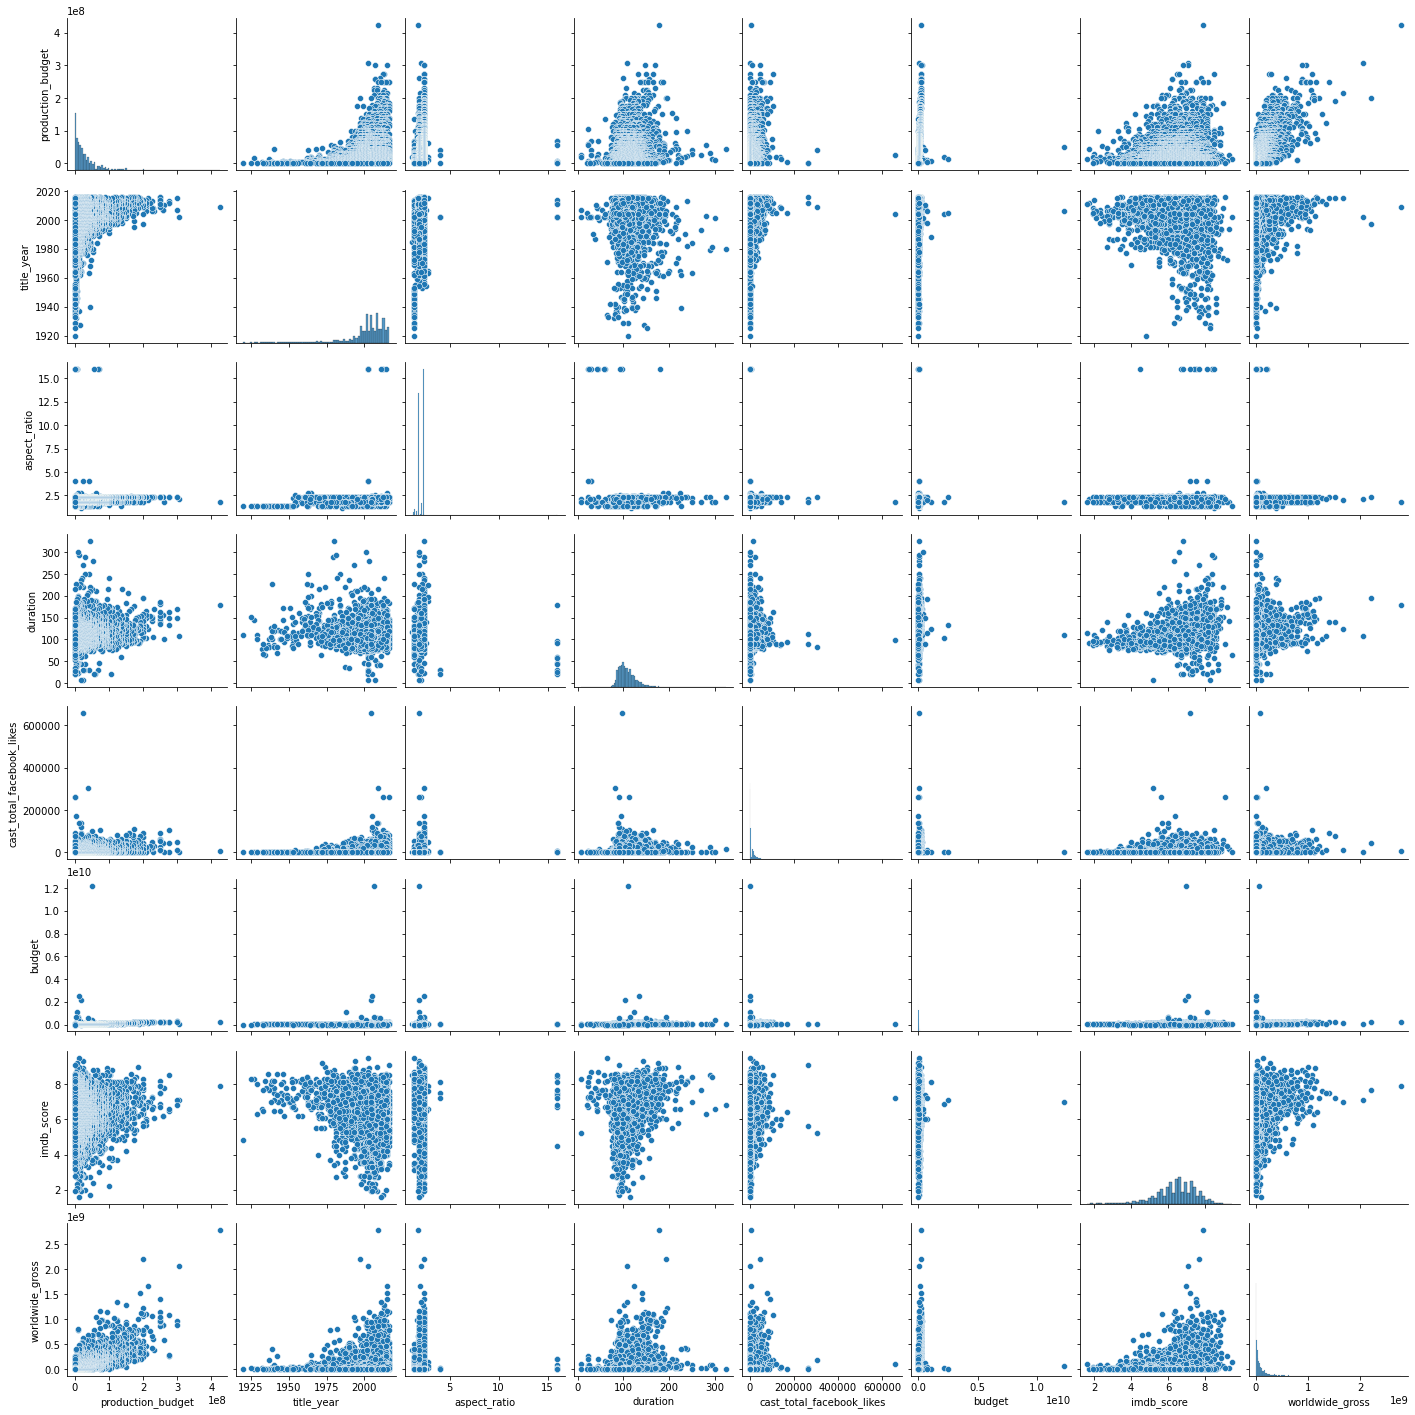

In [81]:
import seaborn as sns

Z = pd.concat([X, y], axis=1)
sns.pairplot(Z)

Este gráfico busca graficar como está distribuida cada variable.

#### bins

In [82]:
# Se categorizaran los valores de production_budget en distintos bins.
clase = pd.cut(X['production_budget'],8).cat.codes.rename('class')
Z2 = pd.concat([X, clase], axis=1)
Z2.head(2)

,production_budget,title_year,aspect_ratio,duration,cast_total_facebook_likes,budget,imdb_score,class
0,425000000.0,2009.000000,1.780000,178.000000,4834.0,2.370000e+08,7.9,7
1,306000000.0,2002.130733,2.126976,108.577186,143.0,4.045539e+07,7.1,5


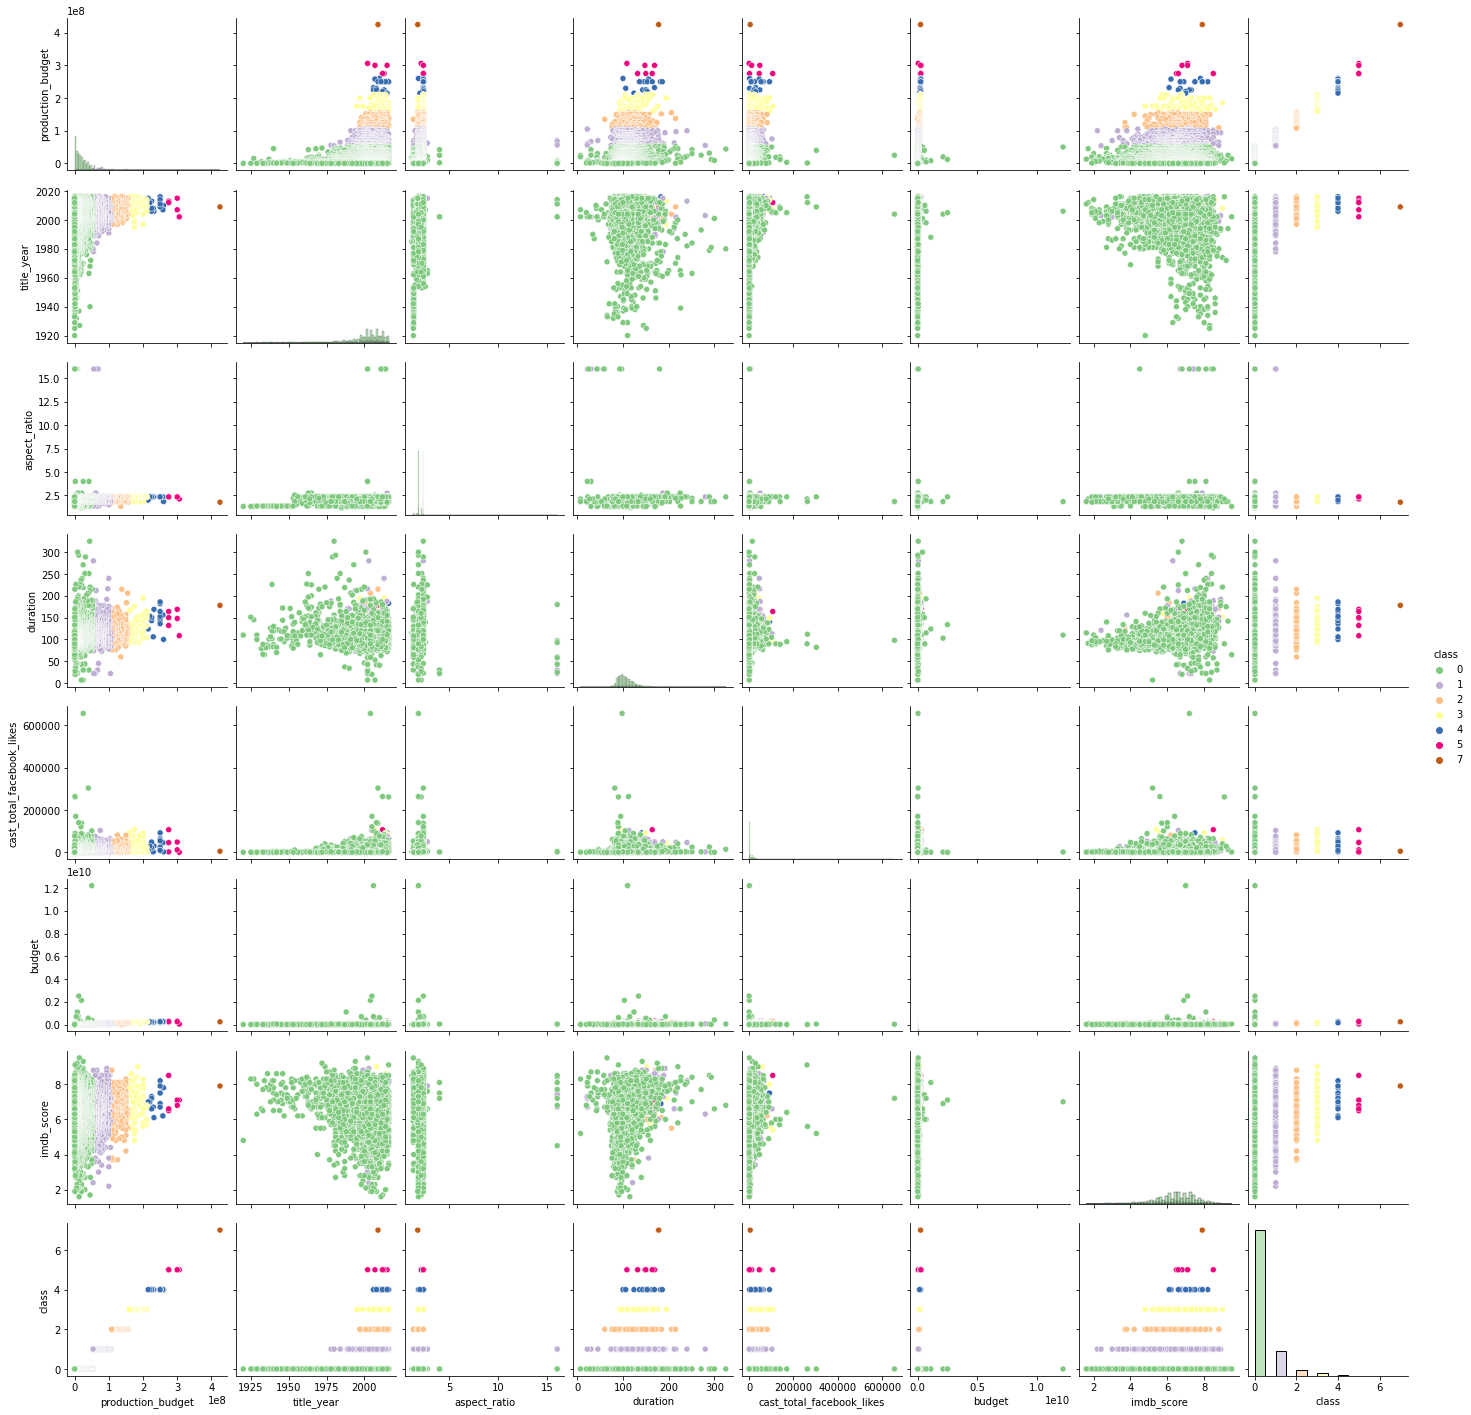

In [83]:
# hue='class' pintará según los valores de class
sns.pairplot(Z2, hue='class', palette='Accent', vars=Z2.columns, diag_kind='hist')

<AxesSubplot:>

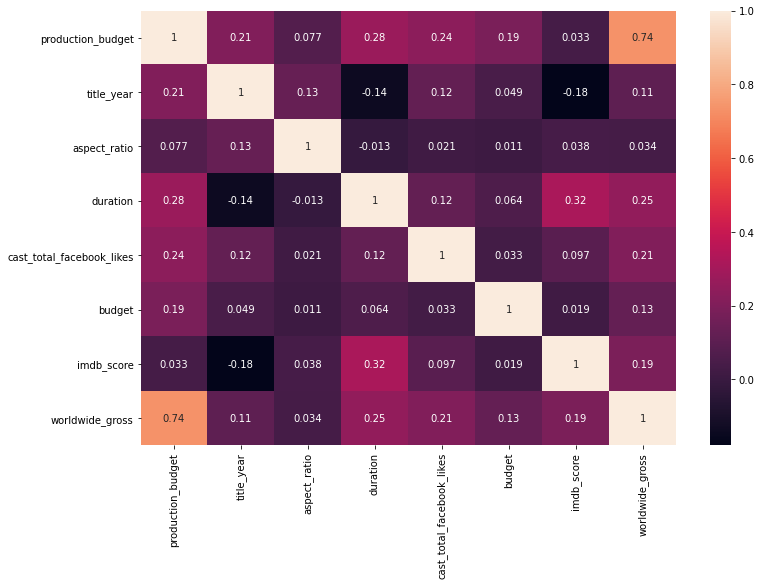

In [84]:
Z3 = pd.concat([X,y], axis=1)
sns.heatmap(Z3.corr(), annot=True)

Del gráfico anterior se puede concluir que son muy importantes las variables:

- production_budget
- imdb_score

También que production_budget es la variable más importante para definir si una película generará grandes ganancias.

## Métodos de Selección Automática de Features

Sklearn posee una serie de métodos para seleccionar las mejores features. Estos métodos los puedes encontrar en sklearn.feature_selection

In [85]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
# SelectKBest hace un análisis univariado.
# Cada Feature es analizada, se mira que tanta información aporta, y luego se elijen las k mejores
# Es la métrica que dice que tanta información aporta una Feature.
selector = SelectKBest(mutual_info_regression, k=4)
selector.fit(X,y)

SelectKBest(k=4,
            score_func=<function mutual_info_regression at 0x00000235E90F5280>)

Se visualizan cuales fueron las mejores Features, las 4 Features elegidas.

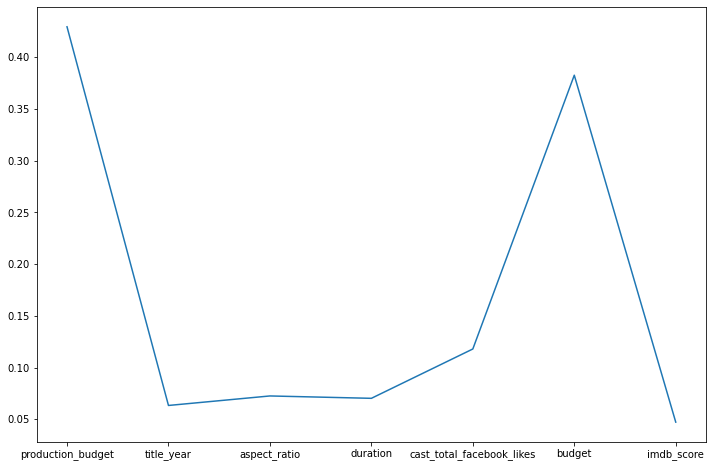

In [86]:
scores = selector.scores_

# configuración del gráfico para que se vea más grande
plt.rcParams['figure.figsize'] = [12,8]
plt.plot(scores)
plt.xticks(np.arange(7), list(X.columns));

Del análisis univariante se obtiene que las mejores features son:

- production_budget
- cast_total_facebook_likes
- budget


**Se guardan las 5 features entregadas por la interpretación de la regresión Lasso**

In [87]:
X2 = X[['production_budget', 'title_year', 'duration', 'cast_total_facebook_likes', 'imdb_score']]
X3 = X[['production_budget', 'cast_total_facebook_likes', 'imdb_score']]

### Visualización de los resultados del modelo con las features

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [89]:
# Se separan los datos del dataset original X y y, luego se filtran por columnas.
cols2 = ['production_budget','title_year','duration','cast_total_facebook_likes','imdb_score']
X2_train, X2_test, y2_train, y2_test = X_train[cols2], X_test[cols2], y_train, y_test

cols3 = ['production_budget','cast_total_facebook_likes','imdb_score']
X3_train, X3_test, y3_train, y3_test = X_train[cols3], X_test[cols3], y_train, y_test

In [90]:
from sklearn.linear_model import Lasso

# se instancian 3 modelos Lasso
model1 = Lasso()
model2 = Lasso()
model3 = Lasso()

model1.fit(X_train,y_train)
model2.fit(X2_train,y2_train)
model3.fit(X3_train,y3_train)

Lasso()

In [91]:
print(model1.score(X_test,y_test))
print(model2.score(X2_test,y2_test))
print(model3.score(X3_test,y3_test))

0.5328090521072175
0.531879361963778
0.5321645588447301


De lo anterior se puede deducir que no fue tan útil reducir la dimensión. 

## Transformación de Features: Escalamiento de los datos

<div class="alert alert-success">
  Nota: Los modelos de regresión no se ven afectados por el escalamiento de las features. Los de clasificación sí. 
</div>

### Simplificar las transformaciones con pipelines

<div class="alert alert-info">
Para hacer el código más reproducible, y para evitar tener que aplicar múltiples veces una misma transformación, se recomienda utilizar <code>sklearn.pipeline.make_pipeline</code> que permite encadenar transformaciones a los modelos.
</div>

In [92]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Encadena los dos objetos StandardScaler y Lasso
model_scaled = make_pipeline(StandardScaler(),
                            Lasso())

model_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [93]:
print(model_scaled.score(X_test, y_test))

0.5328090518896201


## Cross Validation y Selección de Modelos

### Métodos de evaluación

Por ahora hemos visto que:
 
- Se necesita **separar de forma aleatoria** en datos de entrenamiento y testeo para poder evaluar el rendimiento del algoritmo.
- Existen diversas **métricas para evaluar rendimiento**, y se elige una según las características de un problema.
- Es útil **apoyar la evaluación con visualizaciones de errores**, como por ejemplo scatterplots de residuales.

Sin embargo el método hasta ahora tiene una falla. Este depende de la forma en que fueron elegidos los datos de forma aleatoria:

- Se puede tener suerte y obtener un train-set y un test-set que sea ideal para el modelo.
- Se puede tener mala performance con esa separación de datos pero no en otros.

**Controlar la aleatoriedad en train_test_split**

train_test_split separa los datos, cada vez que se llama, de forma diferente. Para poder comparar modelos, hacer un código más limpio y compacto y para poder hacer los experimentos reproducibles se utilizará el parámetro random_state.

In [99]:
# Se separa el set de datos en un set de entrenamiento y otro de set
X_opening_dataset_url = 'https://raw.githubusercontent.com/JuanPabloMF/datasets-platzi-course/master/intermediate_results/X_opening.csv'
X = pd.read_csv(X_opening_dataset_url)
y = X['worldwide_gross']
X = X.drop('worldwide_gross', axis=1)

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [108]:
X_train.head()

,production_budget,title_year,aspect_ratio,duration.1,cast_total_facebook_likes,budget,imdb_score,opening_gross,screens
1724,20000000.0,2004.0,1.85,99.0,1189.0,40000000.0,4.8,6160886.0,2445.0
2027,14000000.0,1998.0,2.35,99.0,3500.0,14000000.0,5.5,10515444.0,2257.0
1843,18000000.0,2008.0,2.35,98.0,2215.0,18000000.0,5.1,300000.0,482.0
470,72000000.0,2001.0,2.35,116.0,14780.0,72000000.0,4.5,12174504.0,2905.0
1225,31000000.0,2012.0,2.35,138.0,20952.0,31000000.0,7.3,24900566.0,1884.0


**random_state** sirve para que cada vez que se ejecute train_test_split, se produzca siempre el mismo resultado, y los datos no cambien cada vez que se reinicie el jupyter notebook.

**¿Qué ventajas tiene train_test_split frente a Cross Validation?**  
- Permite prototipar rápidamente
- Cross Validation es más costoso en computo

### Cross Validation

Se separan en n pedazos los datos y se hacen n evaluaciones.

![](https://es.mathworks.com/discovery/cross-validation/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1623131651564.jpg)

In [109]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso

scores = cross_val_score(Lasso(), X, y, cv=5, scoring='r2')
scores

array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894])

Se tienen 5 scores. Ahora se promedian.

In [110]:
scores.mean()

0.4496402174579169

In [112]:
Lasso().fit(X_train, y_train).score(X_test, y_test)

0.792619029496336

 ### Selección de Modelos

In [113]:
!pip install --upgrade scikit-learn

In [116]:
# cross_validate es una función más poderosa que cross_val_score porque entrega más información:
# tiempos de entrenamiento y predicción, score de entrenamiento y de test
from sklearn.model_selection import cross_validate

results = cross_validate(Lasso(), X,y, return_train_score=True, cv=5)
results

{'fit_time': array([0.00997281, 0.00695658, 0.01492047, 0.00598359, 0.00797176]),
 'score_time': array([0.00299311, 0.00302291, 0.00199437, 0.00199437, 0.00199652]),
 'test_score': array([0.59316596, 0.68931527, 0.55383855, 0.18147236, 0.23040894]),
 'train_score': array([0.68988012, 0.77004932, 0.76604995, 0.76123379, 0.75837599])}

In [117]:
# Se guardan los resultados en variables.
train_scores = results['train_score']
test_scores = results['test_score']
print(np.mean(train_scores))
print(np.mean(test_scores))

0.7491178363039035
0.4496402174579169


Entre el score del train_set y el score del test_set, hay una **gran diferencia**, hay una **varianza alta**. 
Y como el score de 0.74 del train_set no es tan bueno, se puede decir que hay **sesgo**: El modelo no está encajando muy bien con los datos. Por así decirlo, se ha llegado a un tope de calidad del entrenamiento.  

En este caso se van a intentar buscar nuevos modelos.  

## Modelo: k-nearest neighbors (KNN)

Busca los puntos más cercanos que se tienen de entrenamiento, y promedia su valor. Eso dará la predicción para un valor que no esté en el set de entrenamiento.